<a id='top'></a>

# Homework 3: CSCI 4022 F19
***

**Name**: Adam Ten Hoeve

***

This assignment is due on Canvas by **MIDNIGHT on Friday October 18**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.
**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Theory: Item Baskets; 15 pts)

In using triangular arrays to store item basket data, we defined the function $a[k] :=$ count for the pair ${i, j}$, where $1 \leq i < j \leq n,$ with

$k=(i-1)\left(n-\frac{i}{2}\right) +j -i$


This formula involves dividing an arbitrary integer i by 2. Yet $k$ is an index, so we need to have k be an integer. Prove that k will, in fact, be an integer.


There are two cases we should consider for the $\frac{i}{2}$ term, being whether $i$ is even or odd.
* Even: If $i$ is even, then the $\frac{i}{2}$ term is still an integer, in which all remaining operations (addition, subtraction and multiplication) will still result in $k$ being an integer.
* Odd: Let's start by rewriting our statement as:

$$
\begin{align*}
    (i-1)\Big(n-\frac{i}{2}\Big)+j-i &= (i-1)\Big( \dfrac{2n-i}{2} \Big) +j-i \\
    &= \Big( \dfrac{2n(i-1) - i(i-1)}{2}\Big) +j-i \\
    &= \dfrac{2n(i-1)}{2} - \dfrac{i(i-1)}{2} +j-i
\end{align*}
$$

From here we can note that we have two term that could potentially be non-integer terms: $\dfrac{2n(i-1)}{2}$ and $\dfrac{i(i-1)}{2}$. 
1. The first term simplifies to $n(i-1)$, which is the mulitplication of two integers, and will result in an integer.
2. For the second term, note that $i-1$ is an even value, so it is evenly divisible by 2. Therefor, if we let $i-1 = 2g$, where g is some integer, then we can rewrite our term as $\frac{2gi}{2} = gi$. Both $g$ and $i$ are integers so the product will result in another integer.

All the remaining operations are additions and subtractions of integers, which can only result in a value of k which is also an integer.

Therefor, all values of $i$ will result in $k$ being an integer.

***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (Theory: Item Baskets; 15 pts)

Suppose we have 20 distinct items numbered 1 to 20. Each basket is constructed by including the item numbered `k` with probability $1/k$, independent of other items.  As a result, all baskets will include item 1, half will include item 2, and so forth.  What are all of the *itemsets* expected to be frequent at a support threshold of 5%?

Note: You may use simulation if you prefer, but I suspect you may find the pen-and-paper answer is easier.

Let's analyze this problem by looking at each basket size and seeing if the least likely item will be inside of it.

For singletons, the least likely item is item 20, with a $1/20 = 0.05$ chance of being in each basket, which makes it frequent based on our threshold. Because this is the least likely item, all other items will also be frequent because they appear more often than item 20. Therefor all singletons are frequent at a support threshold of $5%$.

Starting with tuple itemsets, we will start using the independence of the items where we can solve the shared probability $P(k_1 \text{ and } k_2) = P(k_1)P(k_2)$. If this joint probability is $\geq 0.05$, then the joint set is frequent. 
* For k=1, the worst case of k=20 leads to a joint of $P(k_1)P(k_{20}) = (1)(1/20) = 1/20$ which is frequent. If the worst case is fequent, then all tuples where one element is $k_1$ will be frequent.
* For k=2, the largest other item that still leads to a fequent itemset is $k_{10}$ as $P(k_2)P(k_{10}) = (1/2)(1/10) = 1/20$. Therefor item 2 creates frequent tuples with all other items where k <= 10.
* For k=3, the largest item with a frequent itemset is $k_6$ as $P(k_3)P(k_6) = (1/3)(1/6) = 1/18$. Therefor, $k_3$ forms frequent tuples with all items k <= 6.
* For k=4, the only item with a larger k that is still within the threshold is with $k_5$. $P(k_4)P(k_5) = (1/4)(1/5) = 1/20.$ Therefor $k_4$ is only frequent with items k <= 5.
* For k=5, there are no items larger than it that it is makes a frequent tuple with. Therefor, no other item which has a high k value (and lower probability) can have a tuple that is higher either.

The resulting frequent tuples are: $(1,2), (1,3), \dots, (1,20), (2,3), (2,4), \dots,(2,10), (3,4), (3,5), (3,6), (4,5)$.

To get the itemsets of three items, it's easiest to realize that if an itemset is frequent, then all of its subsets must also be frequent. In order for a single triple itemset to be frequent, there needs to be 3 tuples that are frequent that pairwise contain all the items in the triple. This means we only need to look at triples that can be formed from our frequent tuples.
* For k=1, because $P(k_1) = 1$, it can be added to any tuple that doesn't already contain 1 and still have a support value greater than the threshold.
* For k=2, there are four possible sets of three items made from the fequent tuples: (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5).
    - P(k_2, k_3, k_4) = (1/2)(1/3)(1/4) = 1/24 < 1/20. Therefor it can't be frequent
* Because the above triple isn't frequent, and all of the other combinations will have higher probabilities, there are no frequent triples that contain k=2. Or abstracting that even further, no other triple sets.

This results in the frequent triples of: $(1, 2, 3), (1,2,4), \dots, (1,2,10), (1,3,4), (1,3,5), (1,3,6), (1,4,5)$

There can be no frequent quadruple sets because there aren't enough frequent triples with matching elements to form a frequent quadruple. But let's prove it anyways. For quadruple, the best case would be the items $k_1, k_2, k_3 \text{ and } k_4 \rightarrow P(k_1)P(k_2)P(k_3)P(k_4) = (1)(1/2)(1/3)(1/4) = 1/24 < 1/20$. If the best case, with the most likely items do not have a high enough probability to be frequent, then no other basket of four items can be frequent either. Therefor, there are no frequent itemsets with 4 items.

Putting that all together, we get the expected frequent itemsets to be: 

$ \boxed{ (1), (2), (3), (4), (5), (6), (7), (8), (9), (10), (11), (12), (13), (14), (15), (16), (17), (18), (19), (20), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1,7), (1,8), (1,9), (1, 10), (1,11), (1,12), (1,13), (1,14), (1,15), (1,16), (1,17), (1,18), (1,19), (1,20), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9), (2,10), (3,4), (3,5), (3,6), (4,5), (1,2,3), (1,2,4), (1,2,5), (1,2,6), (1,2,7), (1,2,8), (1,2,9), (1,2,10), (1,3,4), (1,3,5), (1,3,6), (1,4,5) } $

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (Practice: Item Baskets; 30 pts)

Consider the Online Retail data set provided in `onlineretail.csv`.  This includes over 500,000 purchases from an online retailer.

We want to use the baskets (marked by `InvoiceNo`) and the items (marked by `StockCode` and/or `Description`) to perform an item basket analysis.

This data set is small enough to run directly from main memory, so you may do that if you wish.  You may also complete this problem using only the first 100,000 entries of the .csv if you wish for shorter computational time.  Be very explicit which you are using.

##### a)  There are some odd entries in the data set.  Make sure that you're discarding any transactions and items with no `Description`, non-positive `Quantity`, or non-positive `Unit Price`.

In [2]:
# Load CSV
df = pd.read_csv("onlineretail.csv")
# Remove rows with null descriptions
df = df[pd.notnull(df['Description'])]
# Remove non-positive Quantity
df = df.loc[df["Quantity"] >= 0]
# Remove non-positive Unit Price
df = df.loc[df["UnitPrice"] >= 0]


#### b) For our first iteration, we will use just `StockCode` for the items.  Use `StockCode` to create a table of frequent single items at 1% support threshold.  For convenience on this part of the problem and part c), you may choose to discard all items with non-integer values in `StockCode`.  Was 1% an appropriate support threshold?  Describe why or why not.

In [3]:
# Remove any items that don't have integer stock codes
df_partb = df.copy()
df_int_stockcode = pd.to_numeric(df_partb["StockCode"], errors="coerce", downcast="integer").dropna()
df_partb = df_partb.loc[df_int_stockcode.index]

# Get the total number of baskets
num_baskets = len(df_partb["InvoiceNo"].unique())

# Create a dataframe for each item with the number of baskets it was in
df_item = df_partb.groupby(by="StockCode").count()[["Quantity"]]

# Calculate the items that are above the support threshold
df_item["IsFrequent"] = (np.array(df_item["Quantity"]) / num_baskets > 0.01)
df_item.loc[df_item["IsFrequent"]]

,Quantity,IsFrequent
StockCode,,
10133,198,True
15036,519,True
16237,297,True
17003,242,True
20668,222,True
...,...,...
85053,330,True
85066,529,True
85150,481,True


In [4]:
print("There are {} total items in the store".format(len(df_item)))
print("there are {} frequent items at the 1% support threshold".format(len(df_item.loc[df_item["IsFrequent"]])))

There are 2870 total items in the store
there are 808 frequent items at the 1% support threshold


From the code above, we can see that 808 items are frequent at the 1% support threshold, out of a total of 2870 items. This means 1% is likely not an appropriate threshold as there could be many potential frequent items, as the power set of prequent items is $2^{808} \approx 1.71*10^{243}$. That's a lot of items. So we should probably increase the threshold so there are fewer frequent single items, and therefor fewer frequent sets.

#### c) Use A-priori to find all frequent  pairs of items from your set of frequent items in a).  Use whatevery support threshold you feel is most appropriate.

In [5]:
# The new support threshold will be 0.025
threshold = 0.025
# From part B, find frequent singles with new support threshold
df_item = df_partb.groupby(by="StockCode").count()[["Quantity"]]
df_item["IsFrequent"] = (np.array(df_item["Quantity"]) / num_baskets > threshold)
print("There are {} frequent items with a threshold of {}".format(len(df_item.loc[df_item["IsFrequent"]]), threshold))

# Create a list of all items
inventory = np.array(df_item.index)
num_items = len(inventory)
L1 = df_item.loc[df_item["IsFrequent"]].index
num_frequent_singles = len(L1)

# Create all baskets
baskets_series = df_partb.groupby("InvoiceNo")["StockCode"].apply(lambda x: set(np.unique(x)))
baskets = baskets_series.to_dict()

# Create lookup dictionary. Frequent items have unique value, all non-frequent items have -1 value.
lookup = {}
for item in inventory:
    lookup[item] = -1
# Assign all frequent single items a unique value
for index, freq_item in enumerate(L1):
    lookup[freq_item] = index

There are 187 frequent items with a threshold of 0.025


In [6]:
# Now we need to find the counts of each pair
# Initalize the triangular array
trips = []
for idx1 in range(num_frequent_singles):
    for idx2 in range(idx1+1, num_frequent_singles):
        trips.append((lookup[L1[idx1]], lookup[L1[idx2]], 0))

# Now we want to populate our triangular array
# For each basket, find all pairs of items
for basket in baskets.values():
    # Only care about items that are already frequent because frequent pairs can only come from 2 frequent singles
    frequent_items = list(basket & set(L1))
    # Get each item pair
    for idx1 in range(len(frequent_items)):
        for idx2 in range(idx1 + 1, len(frequent_items)):
            # Find the item's i and j values
            item1_idx = lookup[frequent_items[idx1]]
            item2_idx = lookup[frequent_items[idx2]]
            # Note that i <= j because triangluar array
            if item1_idx > item2_idx:
                item1_idx, item2_idx = item2_idx, item1_idx
            # Find the index of the triangluar array from the i and j value
            k = int(item1_idx*(len(L1) - (item1_idx+1)/2) + item2_idx - item1_idx - 1)
            # Increment the number of occurances of that tuple by 1
            trips[k] = (item1_idx, item2_idx, trips[k][2]+1)

In [7]:
# We now have the count of each pair, now we need to figure out which ones are frequent.
frequent_pairs = []
for tri_value in trips:
    # For each pair, determine if it is above the threshold
    if tri_value[2] / num_baskets >= threshold:
        # If it is, append it to the list of frequent pairs
        frequent_pairs.append((L1[tri_value[0]], L1[tri_value[1]]))
print("There were {} frequent pairs with a threshold of {}".format(len(frequent_pairs), threshold))     
frequent_pairs

There were 30 frequent pairs with a threshold of 0.025


[('20719', '20724'),
 ('20724', '22355'),
 ('20724', '22356'),
 ('20725', '20726'),
 ('20725', '20727'),
 ('20725', '20728'),
 ('20725', '22382'),
 ('20725', '22383'),
 ('20725', '22384'),
 ('20727', '20728'),
 ('20727', '22382'),
 ('20727', '22383'),
 ('20727', '22384'),
 ('20728', '22383'),
 ('20728', '22384'),
 ('21931', '22386'),
 ('21931', '22411'),
 ('22086', '22910'),
 ('22382', '22383'),
 ('22423', '22697'),
 ('22423', '22699'),
 ('22469', '22470'),
 ('22629', '22630'),
 ('22697', '22698'),
 ('22697', '22699'),
 ('22698', '22699'),
 ('22726', '22727'),
 ('23202', '23203'),
 ('23203', '23209'),
 ('23300', '23301')]

The lists of tuples above is the set of all frequent pairs for the dataset at the 2.5% threshold.

## Extra Credit on Problem 3 (10 pts)

#### d) Use a hash table to hash items from their `Descriptions`.  Include a check to minimize and fix any collisions, as in nb08.

In [8]:
def hashfunc(itemname, p):
    ascii_sum = np.sum([ord(char) for char in itemname])
    hash = ascii_sum % p
    return hash

In [9]:
# Get all the unique descriptions from the dataset
descriptions = np.array(df_partb["Description"].unique())
# Initalize the modulus and hash table
p = 1567
hash_lookup = [False]*p
# Insert each description into the hash table
for dscrp in descriptions:
    # Hash the description
    hv = hashfunc(dscrp, p)
    # If the hash has not already been taken, then fill the empty location
    if not hash_lookup[hv]:
        hash_lookup[hv] = [(dscrp, np.where(descriptions == dscrp)[0][0])]
    # If the bucket is full, then have to fill collisions
    else:
        # If the description has already been seen, then skip it. Don't insert it twice.
        dscrp_in_bucket = [hash_lookup[hv][k][0] for k in range(len(hash_lookup[hv]))]
        if dscrp in dscrp_in_bucket:
            pass
        # Otherwise its a new description and append it to the existing bucket.
        else:
            hash_lookup[hv].append((dscrp, np.where(descriptions == dscrp)[0][0]))

#### e) Use A-priori to find all frequent items and all frequent pairs of items from your hashed data set in part c).

In [10]:
# Create the baskets of descriptions
desc_baskets = df_partb.groupby("InvoiceNo")["Description"].apply(lambda x: set(np.unique(x)))
n_baskets = len(desc_baskets)

# Initialize the inventory
C1_desc = descriptions
n_items = len(C1_desc)
item_counts = np.zeros(n_items)  # Initialize each item count

# Find the counts of each item
for basket in desc_baskets:
    for desc in basket:
        hv = hashfunc(desc, p)
        bucket = hash_lookup[hv]
        for item in bucket:
            if desc == item[0]:
                item_counts[item[1]] += 1
                break

In [11]:
# Find which indexes where frequent
is_frequent = (item_counts / n_baskets) > threshold
is_frequent_index = np.where(is_frequent)
# Using the indexes, find which descriptions where frequent
L1_desc = C1_desc[is_frequent_index]
print("There were {} frequent single descriptions with a {} support threshold.".format(len(L1_desc), threshold))

There were 179 frequent single descriptions with a 0.025 support threshold.


In [12]:
# Now to do frequent pairs
# Start by creating new lookup table
pair_desc_lookup = {}
for idx, desc in enumerate(L1_desc):
    pair_desc_lookup[desc] = idx

# Start by initializing triangular array
desc_tri_array = []
for i in range(len(L1_desc)):
    for j in range(i+1, len(L1_desc)):
        desc_tri_array.append((pair_desc_lookup[L1_desc[i]], pair_desc_lookup[L1_desc[j]], 0))
        
# Want to fill the triangular array with counts of pairs from the baskets
for basket in desc_baskets:
    frequent_descs = list(basket & set(L1_desc))
    for idx1 in range(len(frequent_descs)):
        for idx2 in range(idx1+1, len(frequent_descs)):
            desc1_idx = pair_desc_lookup[frequent_descs[idx1]]
            desc2_idx = pair_desc_lookup[frequent_descs[idx2]]
            
            if desc1_idx > desc2_idx:
                desc1_idx, desc2_idx = desc2_idx, desc1_idx
                
            k = int(desc1_idx*(len(L1_desc) - (desc1_idx+1)/2) + desc2_idx - desc1_idx - 1)
            desc_tri_array[k] = (desc1_idx, desc2_idx, desc_tri_array[k][2]+1)

In [13]:
# Now get all the frequent pairs from the proportions of the count over the number of baskets
L2_desc = []
for tri_value in desc_tri_array:
    if tri_value[2] / n_baskets >= threshold:
        L2_desc.append((L1_desc[tri_value[0]], L1_desc[tri_value[1]]))
        
print("There were {} frequent pairs with a threshold of {}".format(len(L2_desc), threshold))
L2_desc

There were 26 frequent pairs with a threshold of 0.025


[('ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN'),
 ('SPACEBOY LUNCH BOX ', 'DOLLY GIRL LUNCH BOX'),
 ("PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'),
 ('JUMBO BAG PINK POLKADOT', 'JUMBO STORAGE BAG SUKI'),
 ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN '),
 ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG WOODLAND'),
 ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'),
 ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG CARS BLUE'),
 ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'),
 ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SUKI DESIGN '),
 ('JUMBO STORAGE BAG SUKI', 'JUMBO SHOPPER VINTAGE RED PAISLEY'),
 ('HEART OF WICKER SMALL', 'HEART OF WICKER LARGE'),
 ('LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG  BLACK SKULL.'),
 ('LUNCH BAG PINK POLKADOT', 'LUNCH BAG CARS BLUE'),
 ('LUNCH BAG PINK POLKADOT', 'LUNCH BAG  BLACK SKULL.'),
 ('LUNCH BAG CARS BLUE', 'LUNCH BAG  BLACK SKULL.'),
 ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG SUKI DESIGN '),
 ('REGENCY CAKESTAND 3 T

#### f) Did any frequent items appear in part d) that did not in part b)?  If so, list them.

In [14]:
diff_items = []
# For each frequent description
for desc in L1_desc:
    # Find the StockCode of the description
    df_desc = df_partb.loc[df_partb["Description"] == desc]
    desc_stockcode = df_desc["StockCode"].unique()[0]
    # If the stock code is not in the frequent items (using the stock codes), then add it to the list
    if desc_stockcode not in L1:
        diff_items.append((desc_stockcode, desc))
        
diff_items

[]

From the above code, resulting in an empty answer set, we can see that there isn't any "frequent descriptions" that didn't have a matching "frequent StockCode." However, the reason that there were fewer frequent descriptions than StockCodes is because some items, with the same StockCode had different descriptions. If we look at the code cell below, we can see some examples of items that had the same StockCode but different descriptions. This leads the conclusion that some items that were frequent had multiple descriptions, which made the item not frequent when comparing descriptions because there were fewer pairs with each unqiue description.

In [15]:
for i in df_partb.groupby("StockCode")["Description"].unique():
    if len(i) > 1:
        print(i)

['GROOVY CACTUS INFLATABLE' 'check']
['VIPPASSPORT COVER ' 'VIP PASSPORT COVER ']
['RED RETROSPOT PURSE ' 'dotcom']
['JUMBO BAG OWLS' 'found' 'Found' 'wrongly marked 23343' 'Marked as 23343'
 'wrongly coded 23343']
['LUNCH BAG RED RETROSPOT' 'LUNCH BAG RED SPOTTY']
['KENSINGTON COFFEE SET' 'Found']
['RETROSPOT RED WASHING UP GLOVES' 'Found']
['RED FLOCK LOVE HEART PHOTO FRAME' 'check']
['SET/5 RED RETROSPOT LID GLASS BOWLS' 'SET/5 RED SPOTTY LID GLASS BOWLS']
['GREY FLORAL FELTCRAFT SHOULDER BAG' 'Amazon Adjustment']
['12 PENCILS TALL TUBE POSY' 'found']
['RIBBONS PURSE ' 'found']
['SET/20 FRUIT SALAD PAPER NAPKINS ' 'found']
['CHRISTMAS TOILET ROLL' 'had been put aside']
['LARGE CAKE TOWEL, CHOCOLATE SPOTS' 'LARGE CAKE TOWEL CHOCOLATE SPOTS']
['SWISS ROLL TOWEL, PINK  SPOTS' 'SWISS ROLL TOWEL PINK  SPOTS']
['JINGLE BELLS TREE DECORATION' 'found']
['POTTERING IN THE SHED METAL SIGN' 'found']
['GIN + TONIC DIET METAL SIGN' 'GIN AND TONIC DIET METAL SIGN']
['PLEASE ONE PERSON METAL SIGN'

***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 4 (Computation: Power Method; 20 pts)

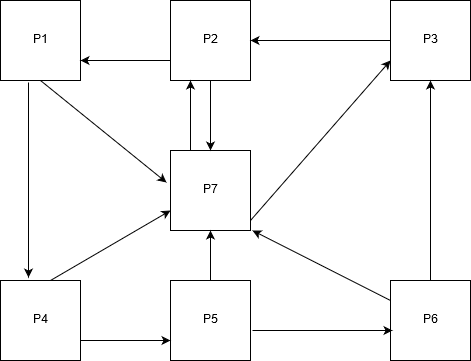

Consider the network graph above.

#### a) Construct a column stochastic matrix representing the graph above, if any valid move is equally likely for each state.

In [16]:
N = 7
M = np.zeros((N, N))
M[0,:] = [0, 1/2, 0, 0, 0, 0, 0]
M[1,:] = [0, 0, 1, 0, 0, 0, 1/2]
M[2,:] = [0, 0, 0, 0, 0, 1/2, 1/2]
M[3,:] = [1/2, 0, 0, 0, 0, 0, 0]
M[4,:] = [0, 0, 0, 1/2, 0, 0, 0]
M[5,:] = [0, 0, 0, 0, 1/2, 0, 0]
M[6,:] = [1/2, 1/2, 0, 1/2, 1/2, 1/2, 0]
M

array([[0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. ]])

#### b) Find the stationary distribution of the random walk implied by the graph above via the power iteration.

In [17]:
def dist_L1(x1, x2):
    return np.sum(np.abs(x1 - np.abs(x2)))

In [18]:
r = np.repeat(1/N, N)
r_old = r.copy()
r_new = np.matmul(M, r_old)
dist = dist_L1(r_new, r_old)
thresh = 0.001
# Iterate until convergence
while dist > thresh:
    r_old = r_new.copy()
    r_new = np.matmul(M, r_old)
    dist = dist_L1(r_new, r_old)

In [19]:
print("Stationary Dist:\n", r_new)

Stationary Dist:
 [0.14616612 0.29231916 0.15059989 0.07299369 0.03656442 0.01827131
 0.28308541]


From the above result, we can see that nodes 2 and 7 end up with the most "flow" and nodes 4, 5 and 6 with the least. This makes sense from the graph because there's a "loop" from nodes $2 \rightarrow 1 \rightarrow 4 \rightarrow 5 \rightarrow 6 \rightarrow 3$, where the loop ends at either 7 or 3. Because all of those node, beside 3, have an outward edge to 7, it makes sense that 7 has a large amount of the flow. Then nodes 7 and 3 only lead to node 2, meaning all flow eventually leads through there causing it to also has a large stationary value. Nodes 4, 5 and 6 all have progressively smaller values because they are further down the loop, where each step has the chance of moving to Node 7, so getting further is less likely.